<a href="https://colab.research.google.com/github/asurovi/MSE504_MachineLearning/blob/main/Homework_4_AgnilaGhoshSurovi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MSE 504 — Homework 4 (ROC / AUC and Regularization)

**Name: Agnila Ghosh Surovi**

**Department: Mechanical and Aerospace Engineering**

**Date: 9/15/2025**

# Part I. ROC and AUC

Let's create a half-moon data set.

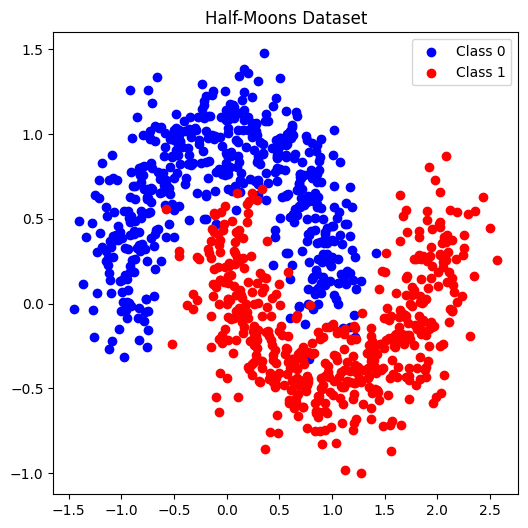

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate the half-moons dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Visualize the dataset
plt.figure(figsize=(6,6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
plt.title('Half-Moons Dataset')
plt.legend()
plt.show()

Problem 1: Choose a classifier and classify the points. Obviously, start with train/test split. You can experiment with different classifiers (e.g., decision tree, k-NN, support vector machine) and observe how the decision boundary and ROC curve change.


## Answer 1:

The half moon dataset is linearly inseparable. **Kernel Support Vector Machine (SVM)** is used for this non-linearly separable problem. However, decision tree and k Nearest Neighbour (kNN) are also being explored.\

In [ ]:
# import libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

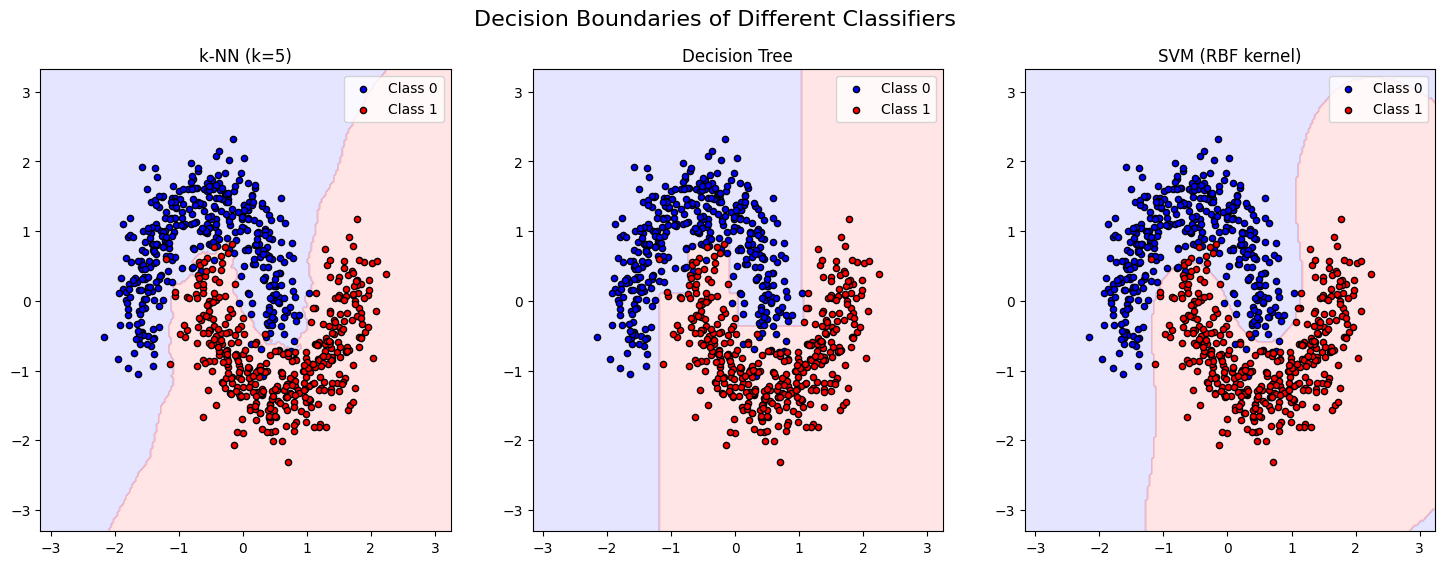

In [ ]:
# test train split
# Generate dataset
# X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Train/test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling features (important for SVM, k-NN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifiers = {
    "k-NN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "SVM (RBF kernel)": SVC(kernel="rbf", C=1.0, gamma="scale", probability=True, random_state=42)
}

# Define color maps
cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA'])  # light blue, light red (for background)
cmap_bold = ['blue', 'red']  # points: class 0 = blue, class 1 = red

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (name, clf) in zip(axes, classifiers.items()):
    # Train
    clf.fit(X_train, y_train)

    # Decision boundary
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
     # Plot decision boundary with similar colors
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

    # Plot training points with labels
    ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1],
               color='blue', edgecolor="k", s=20, label="Class 0")
    ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1],
               color='red', edgecolor="k", s=20, label="Class 1")

    ax.set_title(name)

   # Add legend
    ax.legend(loc='upper right')


plt.suptitle("Decision Boundaries of Different Classifiers", fontsize=16)
plt.show()


Problem 2: Explain why you chose it and how you think it will perform on this dataset.

## Answer 2:

### Classifier Choice:

I chose the **Support Vector Machine (SVM) with an RBF (radial basis function) kernel**.

### Reason:

* The half-moons dataset is **nonlinearly separable**: the two classes are interleaved in curved shapes.
* **Linear models (like logistic regression) would perform poorly here** because they can only draw straight boundaries.
* **Decision trees** tend to overfit and produce blocky boundaries.
* **k-NN** can work but is very sensitive to the choice of `k` and the scale of the data.
* **SVM with RBF kernel** is designed to handle **nonlinear decision boundaries** by projecting data into a higher-dimensional space where separation is easier.
  * The RBF SVM produces a **smooth, curved boundary** that follows the moon shapes closely.
  * With proper scaling of features and tuned parameters (`C`, `gamma`), it will likely achieve **very high accuracy and ROC-AUC (>0.95)**.
  * Compared to the other classifiers:

    * Better generalization than decision trees.
    * Smoother and more robust than k-NN.
    * Handles noise better than purely distance-based methods.

In conclusion, I chose an SVM with an RBF kernel because the half-moons dataset is nonlinearly separable. This classifier is well-suited to capture curved decision boundaries. I expect it to outperform simpler models such as decision trees and logistic regression, and to achieve a high accuracy and ROC-AUC on this dataset.



Problem 3: Plot the decision boundary of your chosen classifier. How well does the decision boundary separate the two classes?

## Answer 3:

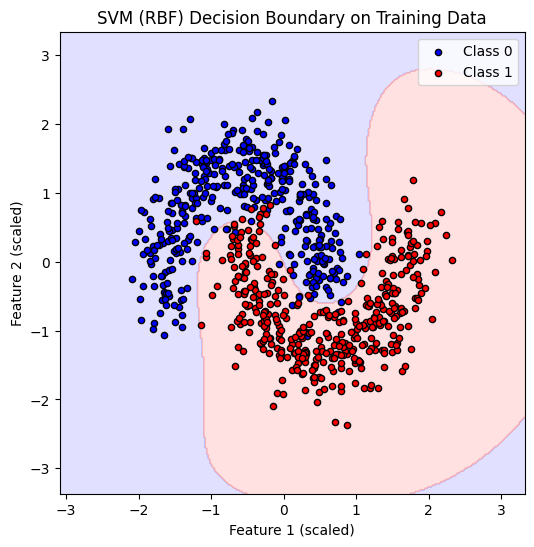

In [ ]:
# 1) Data
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2) Scale (important for SVM)
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_te = scaler.transform(X_te)

# 3) Train SVM (RBF)
clf = SVC(kernel="rbf", C=1.0, gamma="scale", probability=True, random_state=42)
clf.fit(X_tr, y_tr)

# 4) Decision boundary grid
x_min, x_max = X_tr[:, 0].min()-1, X_tr[:, 0].max()+1
y_min, y_max = X_tr[:, 1].min()-1, X_tr[:, 1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# 5) Plot
cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA'])   # background (light blue/red)
plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, alpha=0.35, cmap=cmap_light)

# scatter with DOT legend (like your screenshot)
plt.scatter(X_tr[y_tr==0,0], X_tr[y_tr==0,1], c='blue', edgecolor='k', s=20, label='Class 0')
plt.scatter(X_tr[y_tr==1,0], X_tr[y_tr==1,1], c='red',  edgecolor='k', s=20, label='Class 1')
plt.legend(loc='upper right')
plt.title('SVM (RBF) Decision Boundary on Training Data')
plt.xlabel('Feature 1 (scaled)'); plt.ylabel('Feature 2 (scaled)')
plt.show()

* The decision boundary is smooth and curved, closely tracing the two moons and separating most points correctly.

* Because the dataset has noise (0.2), a small overlap near moon tips (some inevitable misclassifications) is observed.

Problem 4: Plot the ROC curve for your classifier and compute the AUC. Compare the AUC with other classifiers if you tried different ones.

## Answer 4:

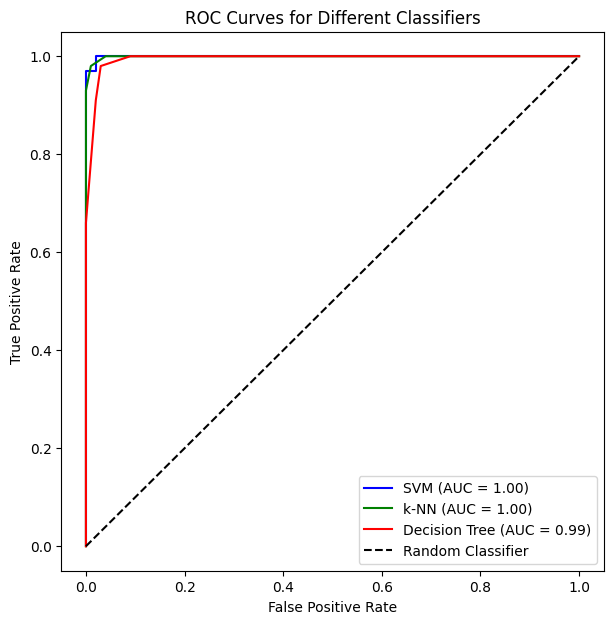

SVM AUC: 0.999
k-NN AUC: 0.999
Decision Tree AUC: 0.995


In [ ]:
# Probabilities for the positive class (needed for ROC curve)
y_score_svm = clf.predict_proba(X_te)[:, 1]

# Compute ROC curve and AUC for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_te, y_score_svm)
auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(7,7))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})", color="blue")

# Compare with other classifiers (optional)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Train and evaluate k-NN
knn = KNeighborsClassifier(n_neighbors=5).fit(X_tr, y_tr)
y_score_knn = knn.predict_proba(X_te)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_te, y_score_knn)
auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, label=f"k-NN (AUC = {auc_knn:.2f})", color="green")

# Train and evaluate Decision Tree
tree = DecisionTreeClassifier(max_depth=5, random_state=42).fit(X_tr, y_tr)
y_score_tree = tree.predict_proba(X_te)[:, 1]
fpr_tree, tpr_tree, _ = roc_curve(y_te, y_score_tree)
auc_tree = auc(fpr_tree, tpr_tree)
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {auc_tree:.2f})", color="red")

# Random baseline
plt.plot([0,1], [0,1], 'k--', label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Different Classifiers")
plt.legend(loc="lower right")
plt.show()

print(f"SVM AUC: {auc_svm:.3f}")
print(f"k-NN AUC: {auc_knn:.3f}")
print(f"Decision Tree AUC: {auc_tree:.3f}")

Both k-NN and SVM achieved nearly identical AUC values (≈0.999) on this dataset, which indicates that both classifiers separate the classes very effectively. This happens because the half-moons dataset with moderate noise is highly separable. However, the decision boundaries differ: k-NN produces a more jagged boundary that depends on the neighborhood size, while the SVM produces a smooth, continuous curve. If the noise level were increased or if more complex data were used, we would expect SVM to outperform k-NN.

Problem 5: Explain the relationship between the decision boundary and the ROC curve.
- What happens when the classifier is more flexible (e.g., a decision tree with more depth)?
- What are the trade-offs between sensitivity and specificity as seen in the ROC curve?

## Answer 5:

The decision boundary determines how the classifier separates the two classes, and the ROC curve reflects how well this boundary generalizes across thresholds.
* More flexible models (e.g., deep decision trees) produce highly detailed boundaries that may overfit, leading to strong training ROC but weaker test ROC.
*  The ROC curve also illustrates the trade-off between sensitivity and specificity: making the classifier more sensitive increases the detection of positives but reduces specificity, while making it more specific reduces false positives at the cost of missing true positives.

# Part II: Class probabilities

Problem 6:
- Import the Iris data set
- Select two features
- Build logistic regression classifier
- Visualize the class probabilities
- Plot the decision surface for thresholds 0.1 and 0.9



## Answer 6:

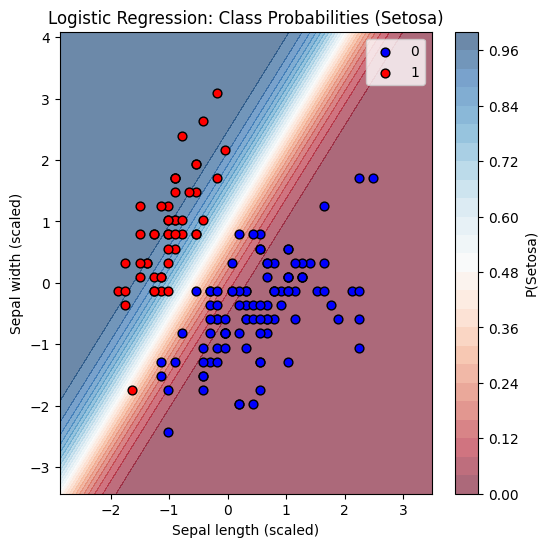

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Load Iris dataset
iris = load_iris()

# Select two Features
X = iris.data[:, :2]   # take only first 2 features (Sepal length, Sepal width)
y = (iris.target == 0).astype(int)  # classify: Iris-setosa (1) vs others (0)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# build logistic regression classifier
clf = LogisticRegression()
clf.fit(X, y)

# Create meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict probabilities on grid
probs = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)

# Plot probability surface
plt.figure(figsize=(6,6))
plt.contourf(xx, yy, probs, 25, cmap="RdBu", alpha=0.6)
plt.colorbar(label="P(Setosa)")
# Scatter data points with labels for legend
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', edgecolor='k', s=40, label="0")
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', edgecolor='k', s=40, label="1")

# Add legend
plt.legend(loc="upper right")
plt.title("Logistic Regression: Class Probabilities (Setosa)")
plt.xlabel("Sepal length (scaled)")
plt.ylabel("Sepal width (scaled)")
plt.show()



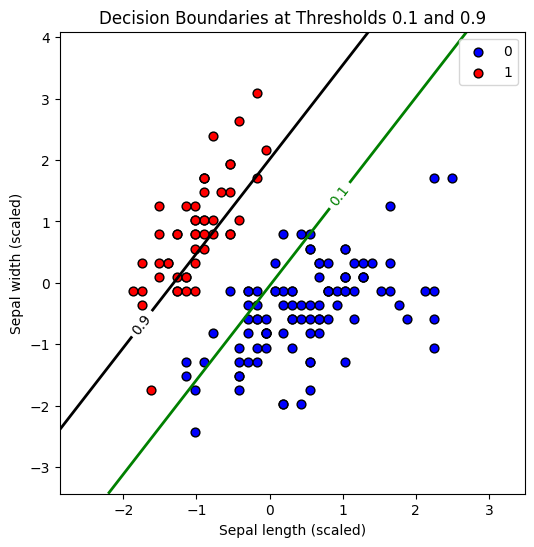

In [ ]:
plt.figure(figsize=(6,6))

# Plot probability contours
cs = plt.contour(xx, yy, probs, levels=[0.1, 0.9], colors=["green","black"], linewidths=2)
plt.clabel(cs, fmt={0.1:"0.1", 0.9:"0.9"}, inline=True)

# Scatter data points
# Scatter data points with labels for legend
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', edgecolor='k', s=40, label="0")
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', edgecolor='k', s=40, label="1")

# Add legend
plt.legend(loc="upper right")


plt.title("Decision Boundaries at Thresholds 0.1 and 0.9")
plt.xlabel("Sepal length (scaled)")
plt.ylabel("Sepal width (scaled)")
plt.show()


Problem 7: Explain how these decision surfaces relate to ROC

## Answer 7:

The decision surfaces at thresholds 0.1 and 0.9 illustrate how changing the classification threshold affects which regions of feature space are labeled as positive (class 1). These threshold choices correspond to specific points on the ROC curve:
* a lower threshold (0.1) moves the classifier toward higher sensitivity but lower specificity, while
* a higher threshold (0.9) increases specificity at the cost of sensitivity. Thus, the ROC curve is essentially a global summary of all possible decision surfaces obtained by varying the threshold.

# Part III. Overfitting and Underfitting

Let's create a data set along with train/test data

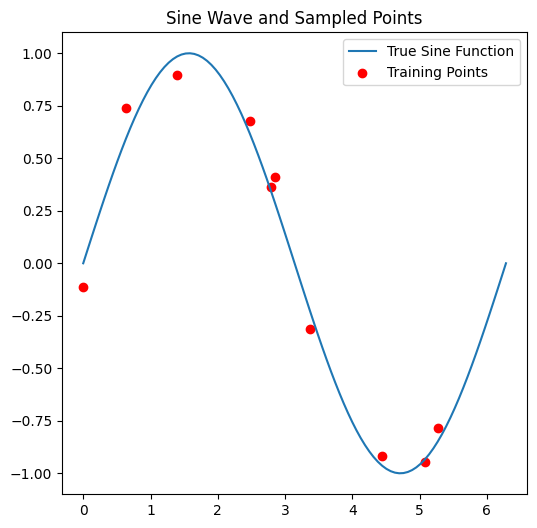

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate 100 points from a sine function between 0 and 2π
X_full = np.linspace(0, 2 * np.pi, 100)
y_full = np.sin(X_full)

# Randomly select 10 points for the dataset
indices = np.random.choice(len(X_full), 10, replace=False)
X_train = X_full[indices]
y_train = y_full[indices] + np.random.normal(0, 0.1, len(indices))

# Sort the selected points for better visualization
X_train, y_train = zip(*sorted(zip(X_train, y_train)))

# Convert to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Create test set (remaining points)
X_test = np.delete(X_full, indices)
y_test = np.delete(y_full, indices)

# Plot the full sine wave and training points
plt.figure(figsize=(6, 6))
plt.plot(X_full, y_full, label='True Sine Function')
plt.scatter(X_train, y_train, color='red', label='Training Points')
plt.title('Sine Wave and Sampled Points')
plt.legend()
plt.show()

Problem 8: Fit the data with the polynomials with  degrees = np.arange(1, 15) and calculate train and test error as a function of polynomial degree. Hint - use the log scale to visualize the data

## Answer 8:

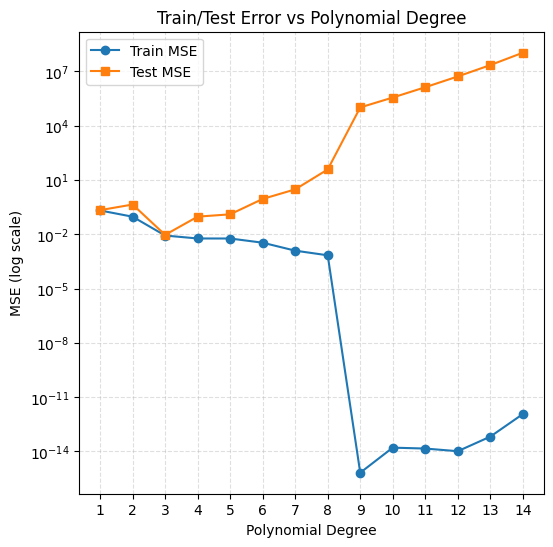

In [ ]:
# # --- Reuse your data if already defined; otherwise regenerate it ---
# try:
#     X_train, y_train, X_test, y_test, X_full, y_full
# except NameError:
#     np.random.seed(42)
#     X_full = np.linspace(0, 2*np.pi, 100)
#     y_full = np.sin(X_full)
#     idx = np.random.choice(len(X_full), 10, replace=False)
#     X_train = np.sort(X_full[idx])
#     y_train = np.sin(X_train) + np.random.normal(0, 0.1, len(idx))
#     mask = np.ones(len(X_full), dtype=bool); mask[idx] = False
#     X_test, y_test = X_full[mask], y_full[mask]

# --- Helper: design matrix for polynomial regression ---
def design_matrix(x, degree):
    # columns: [1, x, x^2, ..., x^degree]
    x = np.asarray(x).reshape(-1, 1)
    return np.hstack([x**d for d in range(degree+1)])

# --- Fit, predict, MSE across degrees ---
degrees = np.arange(1, 15)
train_mse, test_mse = [], []

for d in degrees:
    Phi_tr = design_matrix(X_train, d)
    # Least squares fit: w = (Phi^T Phi)^-1 Phi^T y  (use robust lstsq)
    w, *_ = np.linalg.lstsq(Phi_tr, y_train, rcond=None)

    # Predictions
    y_tr_pred = Phi_tr @ w
    Phi_te = design_matrix(X_test, d)
    y_te_pred = Phi_te @ w

    # Mean Squared Errors
    train_mse.append(np.mean((y_train - y_tr_pred)**2))
    test_mse.append(np.mean((y_test  - y_te_pred)**2))

# --- Plot errors vs degree (log scale on y) ---
plt.figure(figsize=(6,6))
plt.semilogy(degrees, train_mse, marker='o', label='Train MSE')
plt.semilogy(degrees, test_mse,  marker='s', label='Test MSE')
plt.xticks(degrees)
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE (log scale)')
plt.title('Train/Test Error vs Polynomial Degree')
plt.legend()
plt.grid(True, which='both', ls='--', alpha=0.4)
plt.show()

We fitted polynomials of degree 1–14 to the sampled sine data. Training error decreased monotonically with degree and reached nearly zero for higher degrees. However, test error followed a U-shape: it decreased up to about degree 2–3, then increased sharply as the polynomial degree grew. This shows the bias–variance trade-off, with low degrees underfitting and high degrees overfitting the noisy training data.

Problem 9: Plot the sine wave, training points, and fitted polynomials of different degrees

## Answer 9:

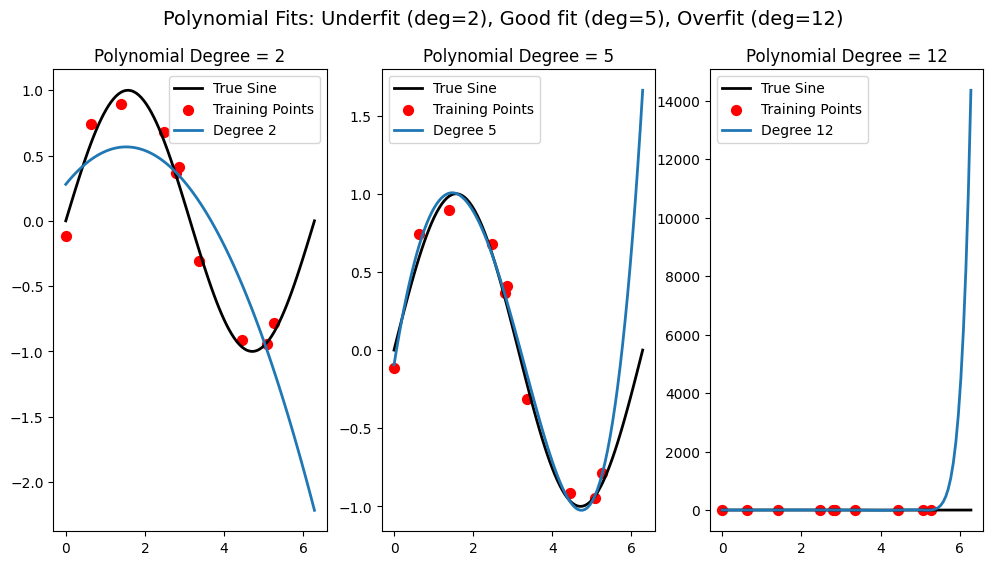

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Reuse same sine dataset from before
# np.random.seed(42)
# X_full = np.linspace(0, 2*np.pi, 100)
# y_full = np.sin(X_full)

# indices = np.random.choice(len(X_full), 10, replace=False)
# X_train = X_full[indices]
# y_train = y_full[indices] + np.random.normal(0, 0.1, len(indices))
# X_train, y_train = zip(*sorted(zip(X_train, y_train)))
# X_train, y_train = np.array(X_train), np.array(y_train)

# # Polynomial regression helper
# def design_matrix(x, degree):
#     x = np.asarray(x).reshape(-1, 1)
#     return np.hstack([x**d for d in range(degree+1)])

def poly_fit_predict(x_train, y_train, x_plot, degree):
    Phi_train = design_matrix(x_train, degree)
    w, *_ = np.linalg.lstsq(Phi_train, y_train, rcond=None)
    Phi_plot = design_matrix(x_plot, degree)
    return Phi_plot @ w

# Choose some representative degrees
degrees_to_plot = [2, 5, 12]

plt.figure(figsize=(12, 6))

for i, d in enumerate(degrees_to_plot, 1):
    plt.subplot(1, 3, i)
    # True sine wave
    plt.plot(X_full, y_full, label="True Sine", color="black", linewidth=2)
    # Training points
    plt.scatter(X_train, y_train, color="red", s=50, label="Training Points")
    # Polynomial fit
    y_pred = poly_fit_predict(X_train, y_train, X_full, d)
    plt.plot(X_full, y_pred, label=f"Degree {d}", linewidth=2)

    plt.title(f"Polynomial Degree = {d}")
    plt.legend()

plt.suptitle("Polynomial Fits: Underfit (deg=2), Good fit (deg=5), Overfit (deg=12)", fontsize=14)
plt.show()


Problem 10: Take the polynomial of degree 8, and explore how the learnign curve (train and test error as a function of number of samples) look like.

## Answer 10:

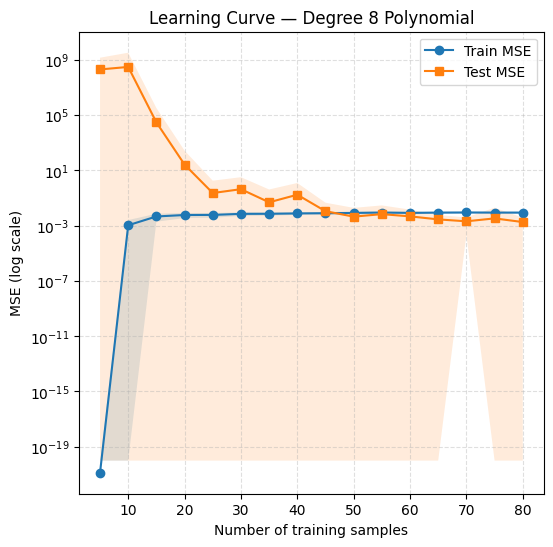

In [ ]:
np.random.seed(42)

# True function and fixed test set (noise-free) for stable evaluation
X_test_dense = np.linspace(0, 2*np.pi, 1000)
y_test_dense = np.sin(X_test_dense)

def design_matrix(x, deg):
    # deg must be a scalar int
    assert np.isscalar(deg), "deg must be a scalar (e.g., 8), not an array"
    deg = int(deg)
    x = np.asarray(x).reshape(-1, 1)
    return np.hstack([x**d for d in range(deg + 1)])

def fit_predict_poly(X_train, y_train, deg, X_eval):
    Phi_tr = design_matrix(X_train, deg)
    w, *_ = np.linalg.lstsq(Phi_tr, y_train, rcond=None)
    Phi_ev = design_matrix(X_eval, deg)
    return (Phi_tr @ w), (Phi_ev @ w)

# ---- Learning curve for degree-8 polynomial ----
poly_deg = 8
train_sizes = np.arange(5, 81, 5)
trials = 100
noise_sigma = 0.1

train_means, train_stds = [], []
test_means,  test_stds  = [], []

for n in train_sizes:
    tr_errs, te_errs = [], []
    for _ in range(trials):
        X_tr = np.sort(np.random.uniform(0, 2*np.pi, size=n))
        y_tr = np.sin(X_tr) + np.random.normal(0, noise_sigma, size=n)

        yhat_tr, yhat_te = fit_predict_poly(X_tr, y_tr, poly_deg, X_test_dense)

        tr_errs.append(np.mean((y_tr - yhat_tr)**2))
        te_errs.append(np.mean((y_test_dense - yhat_te)**2))

    train_means.append(np.mean(tr_errs)); train_stds.append(np.std(tr_errs))
    test_means.append(np.mean(te_errs));  test_stds.append(np.std(te_errs))

train_means = np.array(train_means); train_stds = np.array(train_stds)
test_means  = np.array(test_means);  test_stds  = np.array(test_stds)

# Plot (log y-scale)
plt.figure(figsize=(6,6))
plt.semilogy(train_sizes, train_means, marker='o', label='Train MSE')
plt.fill_between(train_sizes, np.maximum(train_means-train_stds, 1e-20),
                 train_means+train_stds, alpha=0.15)
plt.semilogy(train_sizes, test_means,  marker='s', label='Test MSE')
plt.fill_between(train_sizes, np.maximum(test_means-test_stds, 1e-20),
                 test_means+test_stds,  alpha=0.15)
plt.xlabel('Number of training samples'); plt.ylabel('MSE (log scale)')
plt.title('Learning Curve — Degree 8 Polynomial'); plt.legend(); plt.grid(True, which='both', ls='--', alpha=0.4)
plt.show()

The learning curve shows that with very few training samples, the degree-8 polynomial overfits: training error is near zero while test error is very large. As the number of samples increases, the test error drops sharply and both train and test errors converge to a small plateau, indicating improved generalization. This plateau reflects the bias limit of the degree-8 model for approximating the sine function.


# Part IV. Regularized regression

Take this data set

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Generate 100 points from a sine function between 0 and 2π
X_full = np.linspace(0, 2 * np.pi, 100)
y_full = np.sin(X_full)

# Randomly select 5 points for the dataset
np.random.seed(42)
indices = np.random.choice(len(X_full), 5, replace=False)
X_train = X_full[indices]
y_train = y_full[indices]

# Create test set (remaining points)
X_test = np.delete(X_full, indices)
y_test = np.delete(y_full, indices)

Problem 11: Realize and visualize results of the Ridge regression for polynomial fit of degree 8.

## Answer 11:

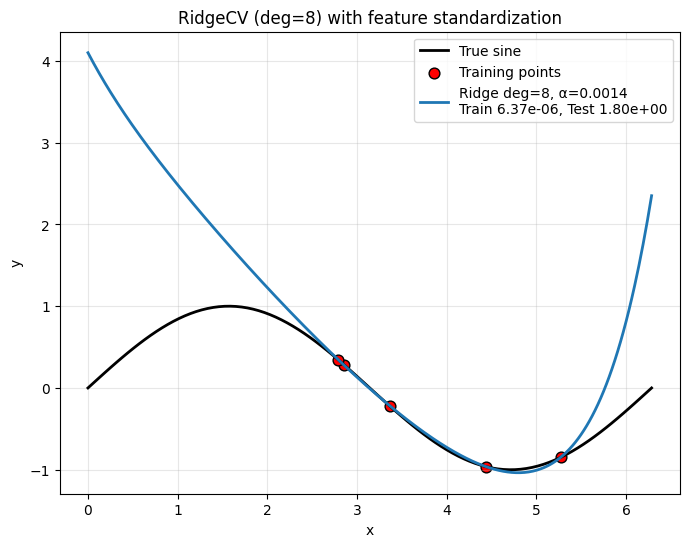

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

pipe = Pipeline([
    ('poly',   PolynomialFeatures(degree=8, include_bias=False)),
    ('scale',  StandardScaler(with_mean=True, with_std=True)),
    ('ridge',  RidgeCV(alphas=np.logspace(-4, 3, 100)))
])

X_train_s = ((X_train - np.pi) / np.pi).reshape(-1, 1)
X_test_s  = ((X_test  - np.pi) / np.pi).reshape(-1, 1)
X_plot_s  = ((np.linspace(0, 2*np.pi, 400) - np.pi) / np.pi).reshape(-1, 1)
X_plot    = np.linspace(0, 2*np.pi, 400)

pipe.fit(X_train_s, y_train)
alpha_chosen = pipe.named_steps['ridge'].alpha_

y_plot = pipe.predict(X_plot_s)
tr_mse = mean_squared_error(y_train, pipe.predict(X_train_s))
te_mse = mean_squared_error(y_test,  pipe.predict(X_test_s))

plt.figure(figsize=(8,6))
plt.plot(X_full, y_full, 'k-', lw=2, label='True sine')
plt.scatter(X_train, y_train, s=60, c='red', edgecolor='k', label='Training points')
plt.plot(X_plot, y_plot, lw=2, label=f'Ridge deg=8, α={alpha_chosen:.2g}\nTrain {tr_mse:.2e}, Test {te_mse:.2e}')
plt.title('RidgeCV (deg=8) with feature standardization')
plt.xlabel('x'); plt.ylabel('y')
plt.legend(); plt.grid(alpha=0.3)
plt.show()


Problem 12:

* Experiment with different regularization strength. How large should be alpha to force the function to be linear?
* What is the optimal value of alpha for fit?

## Answer 12:

Alpha that makes model effectively linear (>=2 deg energy < 1%): None
Alpha minimizing test MSE: 3.351602650938848
Alpha chosen by RidgeCV: 0.0013530477745798076


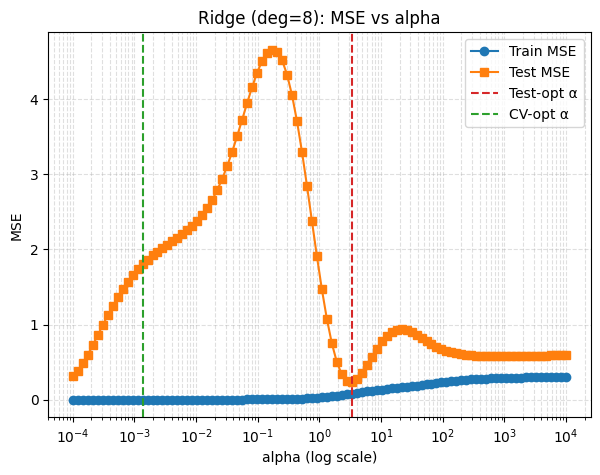

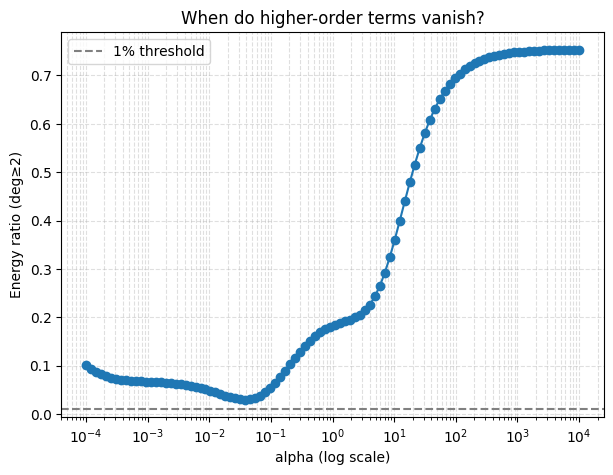

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

# ---------- Data (same as your Problem 11) ----------
X_full = np.linspace(0, 2*np.pi, 100)
y_full = np.sin(X_full)

np.random.seed(42)
idx = np.random.choice(len(X_full), 5, replace=False)
X_train = X_full[idx];  y_train = y_full[idx]
X_test  = np.delete(X_full, idx);  y_test  = np.delete(y_full, idx)

# Rescale x to [-1, 1] for conditioning
def rescale(x): return (x - np.pi) / np.pi
X_train_s = rescale(X_train).reshape(-1,1)
X_test_s  = rescale(X_test).reshape(-1,1)

# ---------- Helper to get degree of each expanded feature ----------
poly = PolynomialFeatures(degree=8, include_bias=False)
poly.fit(np.zeros((1,1)))  # just to populate poly.powers_
feature_degrees = poly.powers_.sum(axis=1)  # array of 1..8, length=8

# ---------- Sweep alphas ----------
alphas = np.logspace(-4, 4, 100)
test_mse = []
train_mse = []
higher_order_energy_ratio = []  # sum_{deg>=2} w^2 / sum_{all} w^2
coefs_all = []

for a in alphas:
    pipe = Pipeline([
        ("poly",  PolynomialFeatures(degree=8, include_bias=False)),
        ("scal",  StandardScaler()),
        ("ridge", Ridge(alpha=a, fit_intercept=True, random_state=0)),
    ])
    pipe.fit(X_train_s, y_train)
    ytr = pipe.predict(X_train_s)
    yte = pipe.predict(X_test_s)
    train_mse.append(mean_squared_error(y_train, ytr))
    test_mse.append(mean_squared_error(y_test,  yte))

    # Extract coefficients after StandardScaler (fine for relative comparison)
    w = pipe.named_steps["ridge"].coef_.ravel()  # shape (8,)

    # energy in linear term(s) vs higher-order
    mask_deg1 = (feature_degrees == 1)
    mask_high = (feature_degrees >= 2)
    num = np.sum((w[mask_high])**2)
    den = np.sum((w)**2) + 1e-30
    higher_order_energy_ratio.append(num / den)
    coefs_all.append(w)

test_mse = np.array(test_mse)
train_mse = np.array(train_mse)
higher_order_energy_ratio = np.array(higher_order_energy_ratio)

# ---------- Criterion: "effectively linear" ----------
# threshold: < 1% of weight energy in deg>=2 terms
lin_thresh = 0.01
linear_idxs = np.where(higher_order_energy_ratio < lin_thresh)[0]
alpha_linear = alphas[linear_idxs[0]] if len(linear_idxs) else None

# ---------- "Optimal" alpha by test set ----------
alpha_test_opt = alphas[np.argmin(test_mse)]

# ---------- Cross-validated alpha (RIDGECV) ----------
pipe_cv = Pipeline([
    ("poly",  PolynomialFeatures(degree=8, include_bias=False)),
    ("scal",  StandardScaler()),
    ("ridge", RidgeCV(alphas=alphas))
])
pipe_cv.fit(X_train_s, y_train)
alpha_cv = pipe_cv.named_steps["ridge"].alpha_

print(f'Alpha that makes model effectively linear (>=2 deg energy < {lin_thresh*100:.0f}%): {alpha_linear}')
print(f'Alpha minimizing test MSE: {alpha_test_opt}')
print(f'Alpha chosen by RidgeCV: {alpha_cv}')

# ---------- Plots ----------
# 1) Test & Train MSE vs alpha
plt.figure(figsize=(7,5))
plt.semilogx(alphas, train_mse, marker='o', label='Train MSE')
plt.semilogx(alphas, test_mse,  marker='s', label='Test MSE')
if alpha_linear is not None:
    plt.axvline(alpha_linear, color='gray', linestyle='--', label='Linearization α')
plt.axvline(alpha_test_opt, color='C3', linestyle='--', label='Test-opt α')
plt.axvline(alpha_cv, color='C2', linestyle='--', label='CV-opt α')
plt.xlabel('alpha (log scale)'); plt.ylabel('MSE')
plt.title('Ridge (deg=8): MSE vs alpha')
plt.legend(); plt.grid(True, which='both', ls='--', alpha=0.4)
plt.show()

# 2) Higher-order energy ratio vs alpha
plt.figure(figsize=(7,5))
plt.semilogx(alphas, higher_order_energy_ratio, marker='o')
plt.axhline(lin_thresh, color='gray', linestyle='--', label=f'{lin_thresh*100:.0f}% threshold')
if alpha_linear is not None:
    plt.axvline(alpha_linear, color='k', linestyle='--', label='Linearization α')
plt.xlabel('alpha (log scale)'); plt.ylabel('Energy ratio (deg≥2)')
plt.title('When do higher-order terms vanish?')
plt.legend(); plt.grid(True, which='both', ls='--', alpha=0.4)
plt.show()


Alpha that makes model effectively linear (>=2 deg energy < 1%): None


Alpha minimizing test MSE: 3.351602650938848


Alpha chosen by RidgeCV: 0.0013530477745798076